In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [20]:
df = pd.read_csv("../data/cleaned/cleaned_reviews.csv")
df.head()


,review,sentiment,clean_review,old_length,new_length
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,1761,1665
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...,998,936
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,926,874
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...,748,685
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...,1317,1237


In [4]:
X = df["clean_review"]      # cleaned text  
y = df["sentiment"]         # positive / negative


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

print("Training size:", len(X_train))
print("Testing size:", len(X_test))


Training size: 40000
Testing size: 10000


In [6]:
tfidf = TfidfVectorizer(
    max_features=50000,          # limit vocab size
    ngram_range=(1,2),           # unigrams + bigrams help SVM
    stop_words="english"
)

X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)


In [7]:
svm = LinearSVC()

svm.fit(X_train_vec, y_train)


,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,None


In [8]:
preds = svm.predict(X_test_vec)


In [9]:
accuracy = accuracy_score(y_test, preds)
print("SVM Accuracy:", accuracy)


SVM Accuracy: 0.8969


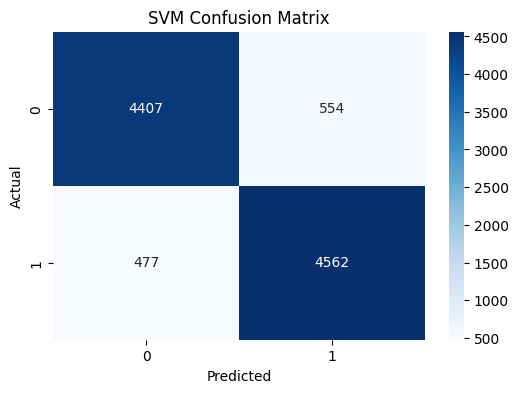

In [10]:
cm = confusion_matrix(y_test, preds)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [11]:
print(classification_report(y_test, preds))


              precision    recall  f1-score   support

    negative       0.90      0.89      0.90      4961
    positive       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [17]:
sample = ["The movie is fantastic"]
sample_vec = tfidf.transform(sample)
print("Prediction:", svm.predict(sample_vec)[0])


Prediction: positive
